# Neural Tangent Kernel (NTK) Illustration

This notebook demonstrates the Neural Tangent Kernel (NTK) method using the modularyNN framework.


The Neural Tangent Kernel (NTK) was introduced by Jacot et al. (2018) to analyze the training dynamics of neural networks. As networks become infinitely wide, their behavior during gradient descent training can be described by a kernel method.

For a neural network $f(x, \theta)$ parameterized by $\theta$, the NTK is defined as:

$$K(x, x') = \nabla_\theta f(x, \theta) \cdot \nabla_\theta f(x', \theta)$$

This kernel measures how changes in parameters affect outputs for different inputs, capturing how function values at different points change together during training.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')  # Add parent directory to path

from Data import DatasetClasses

from Layers.FullyConnected import FullyConnected
from Layers.Activations import ReLU
from Layers.Activations import SoftMax
from Layers.Flatten import Flatten
from Layers.Initializers import He, Constant

from Optimization.Optimizers import Adam
from Optimization.Loss import CrossEntropyLoss

from Helpers.Helpers_NTK import compute_ntk, analyze_ntk_matrix
from Helpers.NeuralNetwork import NeuralNetwork

# Set random seed for reproducibility
np.random.seed(42)

## 1. Load and Prepare the Dataset

Using Iris dataset with 100 samples (20% for testing)


dataset Informations:
--------------------------------------------------
Training samples: 114
Sample shape: (4,)
Number of classes: 3
Test samples: 36
Dataset size in memory: 0.00 MB


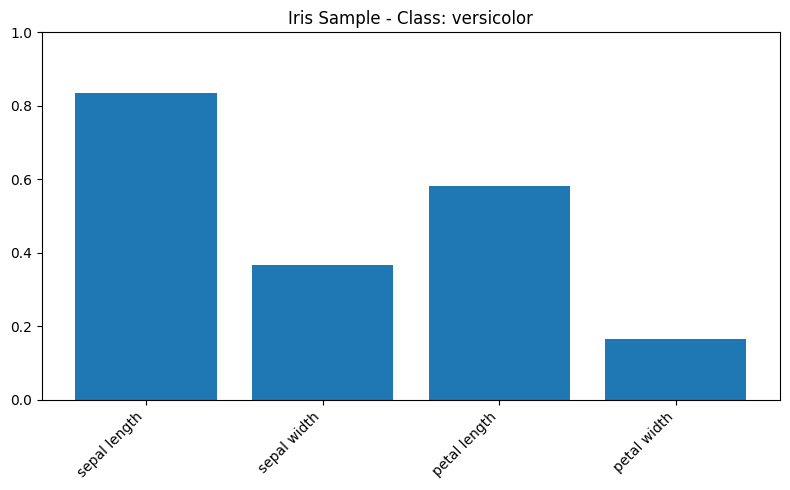

In [2]:
# Load the Iris dataset
batch_size = 10
iris = DatasetClasses.IrisData(batch_size, val_ratio=0)
iris.print_dataset_info()

# Get a small sample of training data for NTK computation
num_samples = 100
X_train, y_train = iris.get_train_set()

# Randomly sample a subset
indices = np.random.choice(X_train.shape[0], num_samples, replace=False)
X_sample = X_train[indices]
y_sample = y_train[indices]

## 2. Define the Neural Network Model

We'll create a simple fully-connected neural network with one hidden layer. This will serve as our base model for computing the Neural Tangent Kernel.

### Define network dimensions
input_dim = 4  # Number of features in the Iris dataset (4 features)

hidden_dim = TO MAKE IT TEND TO INFINITY  # Number of neurons in the hidden layer

output_dim = 3   # Number of classes in the Iris dataset (3 classes)

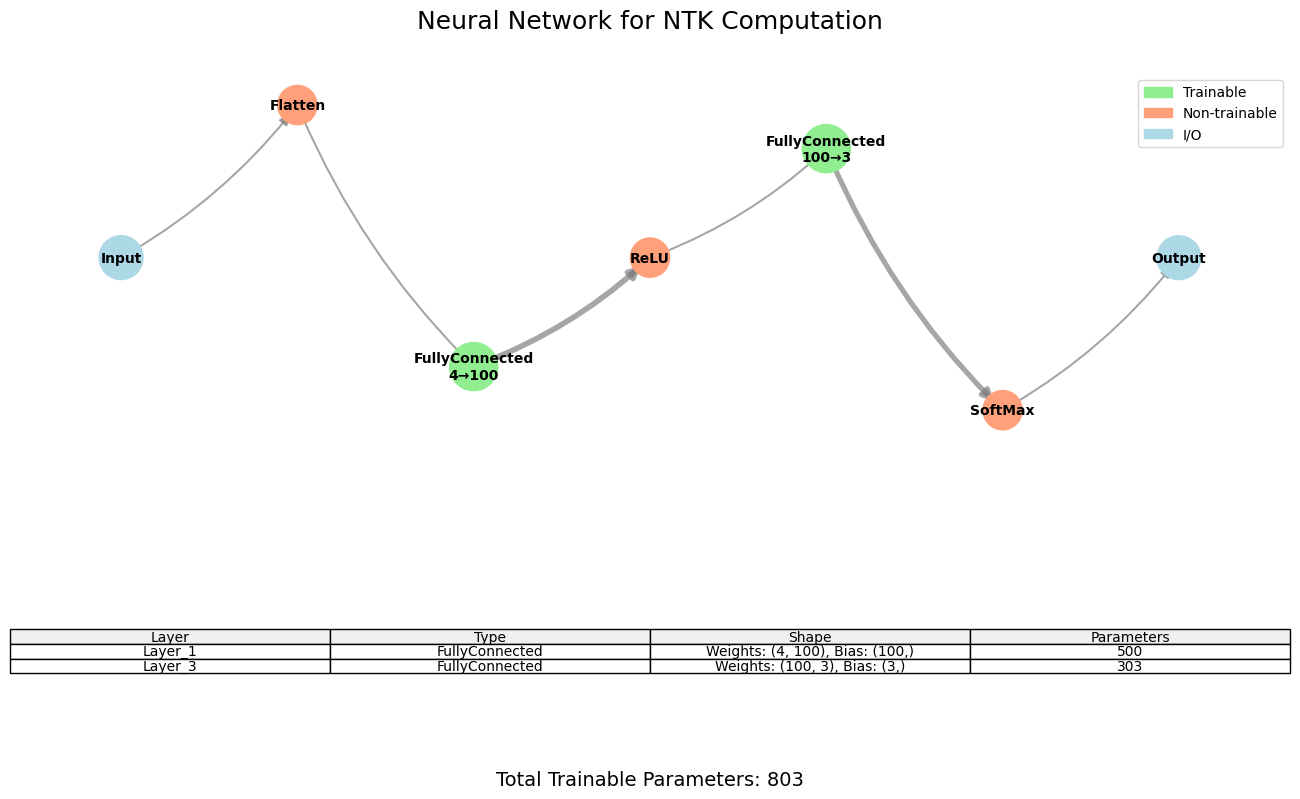

In [3]:
def build_network(hidden_dim, input_dim=4, output_dim=3):
    """Build a simple fully-connected neural network with one hidden layer."""

    learning_rate = 0.01
    optimizer = Adam(learning_rate)

    weights_initializer = He()
    bias_initializer = Constant(0.1)
    net = NeuralNetwork(optimizer, weights_initializer, bias_initializer)
    net.data_layer = iris
    
    # Add layers
    net.append_layer(Flatten())
    net.append_layer(FullyConnected(input_dim, hidden_dim))
    net.append_layer(ReLU())
    net.append_layer(FullyConnected(hidden_dim, output_dim))
    net.append_layer(SoftMax())
    
    # Set loss function
    net.loss_layer = CrossEntropyLoss()
    return net

# Build the network
hidden_dim = 100  # Dimension of the hidden layer
network = build_network(hidden_dim)

# Visualize the network architecture
network.plot(title="Neural Network for NTK Computation")

# network.train(100)

## 4. Compute the Neural Tangent Kernel

The NTK is computed by calculating the Jacobians of the network output with respect to the parameters and then taking their dot product.
This is a computationally intensive process, so we'll use a small subset of the data.

In [4]:
# Compute the NTK (this may take a while)
ntk_matrix = compute_ntk(network, X_sample)

Computing NTK matrix of shape (100, 100)
Computing NTK row 1/100
Progress: 101/5050 pairs (2.0%), ETA: 5.4s
Progress: 202/5050 pairs (4.0%), ETA: 4.3s
Progress: 303/5050 pairs (6.0%), ETA: 3.8s
Progress: 404/5050 pairs (8.0%), ETA: 3.5s
Progress: 505/5050 pairs (10.0%), ETA: 3.3s
Progress: 606/5050 pairs (12.0%), ETA: 3.1s
Progress: 707/5050 pairs (14.0%), ETA: 3.0s
Progress: 808/5050 pairs (16.0%), ETA: 2.8s
Progress: 909/5050 pairs (18.0%), ETA: 2.7s
Computing NTK row 11/100
Progress: 1010/5050 pairs (20.0%), ETA: 2.6s
Progress: 1111/5050 pairs (22.0%), ETA: 2.5s
Progress: 1212/5050 pairs (24.0%), ETA: 2.5s
Progress: 1313/5050 pairs (26.0%), ETA: 2.4s
Progress: 1414/5050 pairs (28.0%), ETA: 2.3s
Progress: 1515/5050 pairs (30.0%), ETA: 2.3s
Progress: 1616/5050 pairs (32.0%), ETA: 2.3s
Progress: 1717/5050 pairs (34.0%), ETA: 2.3s
Computing NTK row 21/100
Progress: 1818/5050 pairs (36.0%), ETA: 2.3s
Progress: 1919/5050 pairs (38.0%), ETA: 2.3s
Progress: 2020/5050 pairs (40.0%), ETA: 2.2

=== NTK Matrix Analysis ===
Shape: (100, 100)
Value range: [0.000000, 1.000000]
Mean value: 0.039932
Std deviation: 0.151468
Diagonal mean: 0.024358
Off-diagonal mean: 0.039688
Symmetric: True

=== Eigenvalue Analysis ===
Minimum eigenvalue: -9.774411e+00
Maximum eigenvalue: 1.204106e+01
Condition number: 5.871371e+13
Positive definite: False
Positive semidefinite: False
Effective rank: 21 / 100 (21.00%)

=== Structure Analysis ===
Sparsity: 50.27%
Diagonal dominance: 0.000000

=== NTK Health Check ===


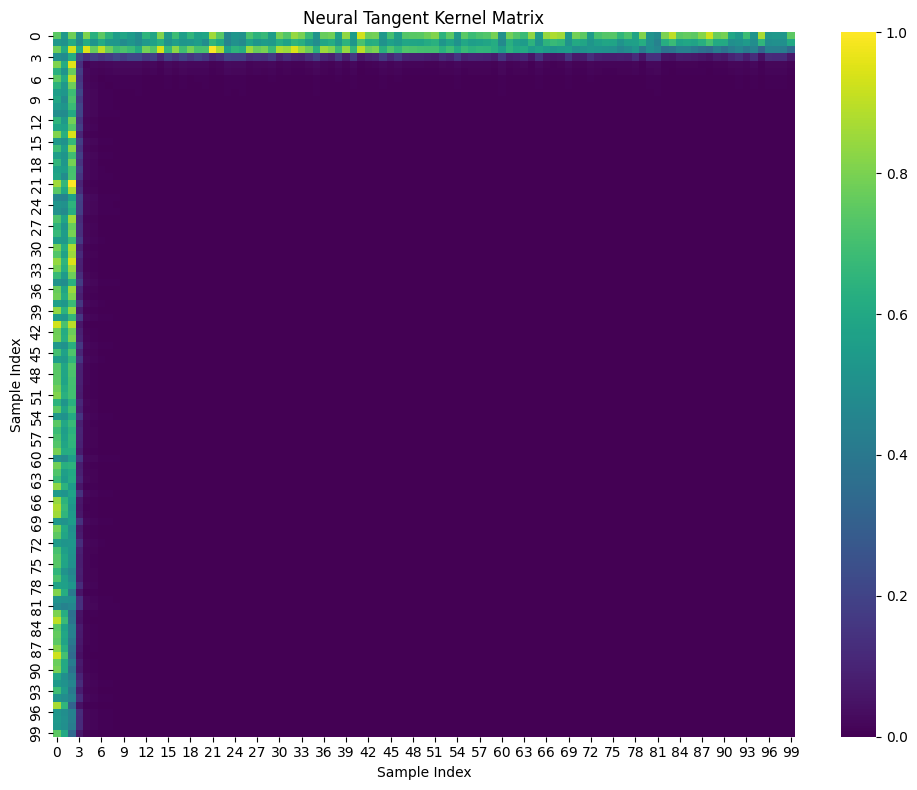

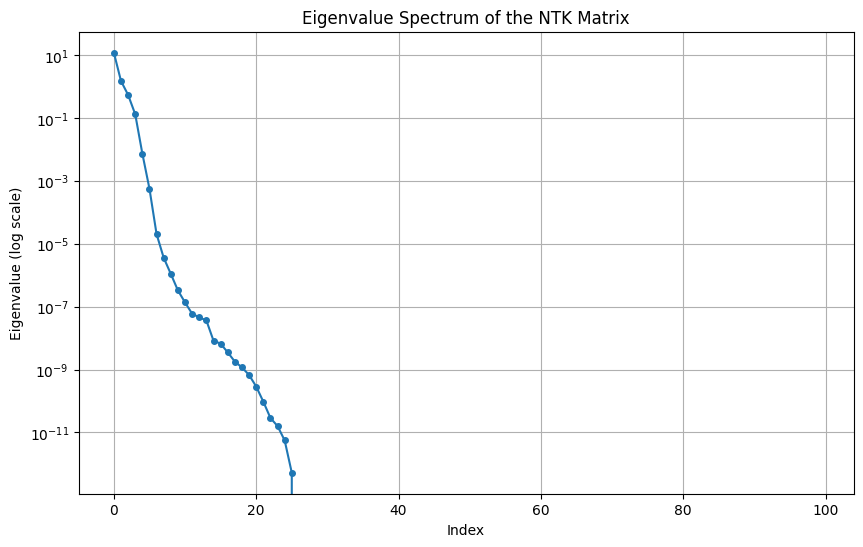

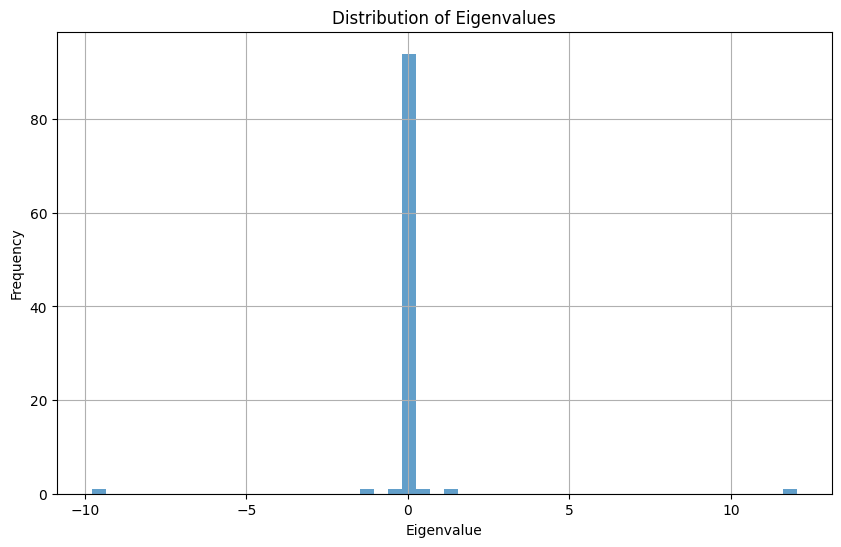

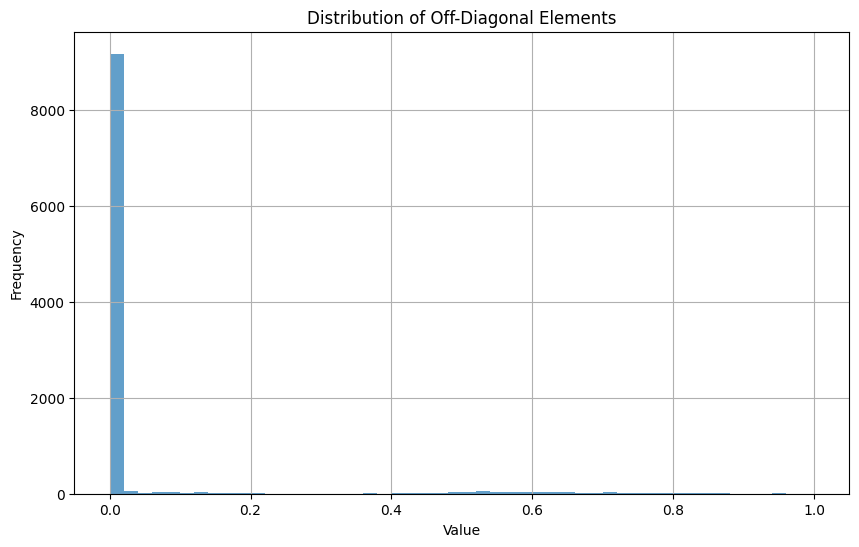

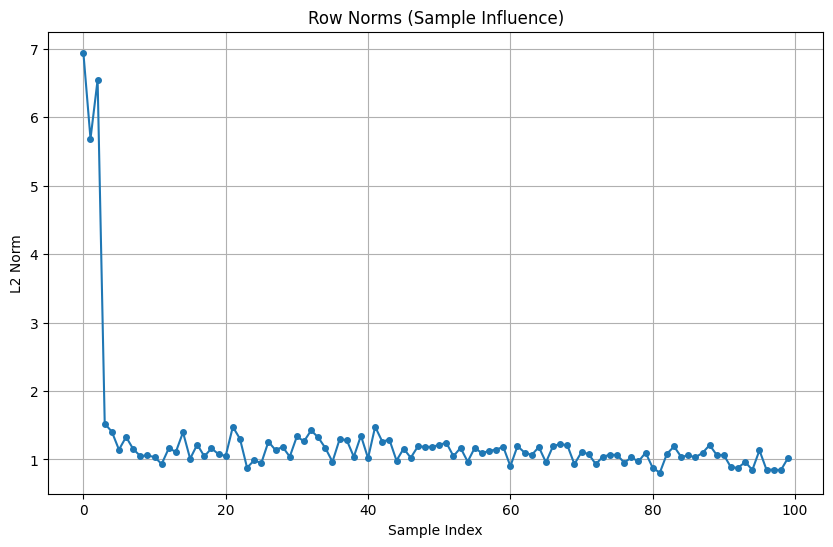

In [5]:
result_ntk_analysis = analyze_ntk_matrix(ntk_matrix)

In [6]:
# Split the data for testing
train_size = int(0.8 * num_samples)
X_ntk_train = X_sample[:train_size]
y_ntk_train = y_sample[:train_size]
X_ntk_test = X_sample[train_size:]
y_ntk_test = y_sample[train_size:]

# Get the kernel matrices
K_train = ntk_matrix[:train_size, :train_size]      # Train-train kernel (80x80)
K_test = ntk_matrix[train_size:, :train_size]       # Test-train kernel (20x80)


print(f"num_samples: {num_samples}")
print(f"train_size: {train_size}")
print(f"ntk_matrix shape: {ntk_matrix.shape}")
print(f"K_train shape: {K_train.shape}")
print(f"K_test shape: {K_test.shape}")
print(f"Test set size: {len(X_ntk_test)}")

num_samples: 100
train_size: 80
ntk_matrix shape: (100, 100)
K_train shape: (80, 80)
K_test shape: (20, 80)
Test set size: 20


### 2. Function doing a Kernel ridge regression

Kernel Ridge Regression (KRR) is a non-parametric regression method that combines Ridge Regression with kernel methods
to capture nonlinear relationships in data. Given a set of training inputs $X = [x_1, ..., x_n]$ and corresponding 
outputs $y = [y_1, ..., y_n]$, the goal is to predict outputs for new inputs using a kernel function $k(x, x')$ 
that measures similarity between data points.

KRR solves the following optimization problem:

minimize over $\alpha$: $\|K\alpha - y\|^2 + \lambda \alpha^\top K \alpha$

where:
- $K \in \mathbb{R}^{n \times n}$ is the kernel matrix with entries $K_{ij} = k(x_i, x_j)$,
- $\alpha \in \mathbb{R}^{n \times d}$ are the dual coefficients (for multi-output regression, $d > 1$),
- $\lambda > 0$ is a regularization parameter to prevent overfitting.

The closed-form solution for $\alpha$ is:

$\alpha = (K + \lambda I)^{-1} y$

Predictions on new test inputs $X_{\text{test}}$ are made using:

$y_{\text{pred}} = K_{\text{test}} \alpha$

where $K_{\text{test}} \in \mathbb{R}^{n_{\text{test}} \times n}$ contains kernel evaluations between test and training samples.

#### Numerical Stability Considerations

- Kernel matrices can be ill-conditioned, especially with small regularization or highly similar input vectors.
- We normalize $K$ by its maximum absolute value to improve numerical stability.
- If the condition number of the regularized kernel matrix is large, we switch from direct solving to an SVD-based method 
  to ensure robustness.

This implementation supports multi-dimensional targets (e.g., multi-class or multi-task regression) and adapts the solver
strategy based on the condition number of the kernel matrix.

In [7]:
def kernel_ridge_regression(K_train, y_train, K_test, lam=1e-3):
    """Improved kernel ridge regression with better numerical stability.
    
    Args:
        K_train: Kernel matrix for training data
        y_train: Training labels
        K_test: Kernel matrix between test and training data
        lam: Regularization parameter
        
    Returns:
        Predicted outputs for test data
    """
    if K_train.shape[0] != K_train.shape[1]:
        raise ValueError("K_train must be square")
    if K_train.shape[0] != y_train.shape[0]:
        raise ValueError("K_train and y_train dimension mismatch")
    if K_test.shape[1] != K_train.shape[0]:
        raise ValueError("K_test and K_train dimension mismatch")
    n_train = K_train.shape[0]
    n_test = K_test.shape[0]
    n_classes = y_train.shape[1]
    
    # Print diagnostic information
    print(f"K_train shape: {K_train.shape}, min: {np.min(K_train):.4f}, max: {np.max(K_train):.4f}")
    print(f"K_test shape: {K_test.shape}, min: {np.min(K_test):.4f}, max: {np.max(K_test):.4f}")
    
    # Normalize the kernel matrices to improve numerical stability
    # This is important for avoiding numerical issues
    scale = np.max(np.abs(K_train))
    if scale < 1e-15:  # More conservative threshold
        print("Warning: K_train appears to be zero matrix")
        return np.zeros((n_test, n_classes))
    if scale > 0:
        K_train_norm = K_train / scale
        K_test_norm = K_test / scale  # Use same normalization factor
    else:
        K_train_norm = K_train
        K_test_norm = K_test
        print("Warning: Maximum value in K_train is 0, skipping normalization")
    
    # Add regularization to the diagonal of K_train
    K_train_reg = K_train_norm + (lam / scale) * np.eye(n_train)
    
    # Check condition number
    eigvals = np.linalg.eigvalsh(K_train_reg)
    condition_number = np.max(eigvals) / np.max([np.min(eigvals), 1e-15])
    print(f"Condition number of regularized kernel matrix: {condition_number:.4e}")
    
    # Use a more robust solver based on condition number
    if condition_number < 1e12:  # Reasonably well-conditioned
        try:
            alpha = np.linalg.solve(K_train_reg, y_train)
        except np.linalg.LinAlgError:
            print("Warning: Linear system solve failed, using least squares")
            alpha = np.linalg.lstsq(K_train_reg, y_train, rcond=None)[0]
    else:
        print("Warning: Matrix is ill-conditioned, using SVD solver")  #svd = Singular Value Decomposition
        # Use SVD for better numerical stability with ill-conditioned matrices
        U, s, Vh = np.linalg.svd(K_train_reg, full_matrices=False)
        # Filter small singular values
        s_inv = np.where(s > 1e-10, 1/s, 0)
        alpha = Vh.T @ np.diag(s_inv) @ U.T @ y_train
    
    # Predict on the test data
    y_pred = K_test_norm @ alpha
    
    return y_pred

K_train shape: (80, 80), min: 0.0000, max: 1.0000
K_test shape: (80, 80), min: 0.0000, max: 1.0000
Condition number of regularized kernel matrix: 1.1156e+16
K_train shape: (80, 80), min: 0.0000, max: 1.0000
K_test shape: (20, 80), min: 0.0000, max: 0.9222
Condition number of regularized kernel matrix: 1.1156e+16
λ=0.00001 | Training Accuracy: 0.8250 | Validation Accuracy: 0.8000
K_train shape: (80, 80), min: 0.0000, max: 1.0000
K_test shape: (80, 80), min: 0.0000, max: 1.0000
Condition number of regularized kernel matrix: 1.1157e+16
K_train shape: (80, 80), min: 0.0000, max: 1.0000
K_test shape: (20, 80), min: 0.0000, max: 0.9222
Condition number of regularized kernel matrix: 1.1157e+16
λ=0.00100 | Training Accuracy: 0.8500 | Validation Accuracy: 0.8500
K_train shape: (80, 80), min: 0.0000, max: 1.0000
K_test shape: (80, 80), min: 0.0000, max: 1.0000
Condition number of regularized kernel matrix: 1.1256e+16
K_train shape: (80, 80), min: 0.0000, max: 1.0000
K_test shape: (20, 80), min: 

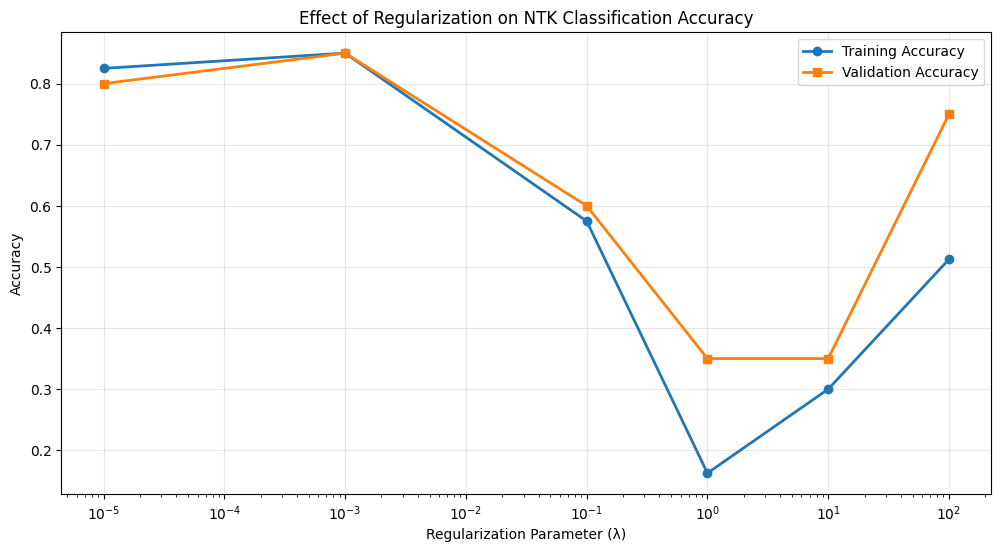


Overfitting Analysis:
λ=0.00001: Gap = 0.0250 (Good fit)
λ=0.00100: Gap = 0.0000 (Good fit)
λ=0.10000: Gap = -0.0250 (Good fit)
λ=1.00000: Gap = -0.1875 (Good fit)
λ=10.00000: Gap = -0.0500 (Good fit)
λ=100.00000: Gap = -0.2375 (Good fit)


In [8]:
# Apply kernel ridge regression with different regularization values
regularization_values = [1e-5, 1e-3, 1e-1, 1, 10, 100]
train_accuracies = []
val_accuracies = []

for lam in regularization_values:
    # Apply kernel ridge regression for training predictions
    y_train_pred = kernel_ridge_regression(K_train, y_ntk_train, K_train, lam=lam)
    
    # Apply kernel ridge regression for validation predictions
    y_val_pred = kernel_ridge_regression(K_train, y_ntk_train, K_test, lam=lam)
    
    # Convert training predictions to class labels
    y_train_pred_class = np.argmax(y_train_pred, axis=1)
    y_train_true_class = np.argmax(y_ntk_train, axis=1)
    
    # Convert validation predictions to class labels
    y_val_pred_class = np.argmax(y_val_pred, axis=1)
    y_val_true_class = np.argmax(y_ntk_test, axis=1)
    
    # Calculate accuracies
    train_accuracy = np.mean(y_train_pred_class == y_train_true_class)
    val_accuracy = np.mean(y_val_pred_class == y_val_true_class)
    
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
    print(f"λ={lam:.5f} | Training Accuracy: {train_accuracy:.4f} | Validation Accuracy: {val_accuracy:.4f}")

# Plot the regularization effect for both training and validation
plt.figure(figsize=(12, 6))
plt.semilogx(regularization_values, train_accuracies, '-o', label='Training Accuracy', linewidth=2)
plt.semilogx(regularization_values, val_accuracies, '-s', label='Validation Accuracy', linewidth=2)
plt.title('Effect of Regularization on NTK Classification Accuracy')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Check for overfitting
print(f"\nOverfitting Analysis:")
for i, lam in enumerate(regularization_values):
    gap = train_accuracies[i] - val_accuracies[i]
    print(f"λ={lam:.5f}: Gap = {gap:.4f} ({'Overfitting' if gap > 0.1 else 'Good fit'})")

### Apply the NTK to the dataset

Best regularization parameter: λ=0.00100
K_train shape: (80, 80), min: 0.0000, max: 1.0000
K_test shape: (20, 80), min: 0.0000, max: 0.9222
Condition number of regularized kernel matrix: 1.1157e+16


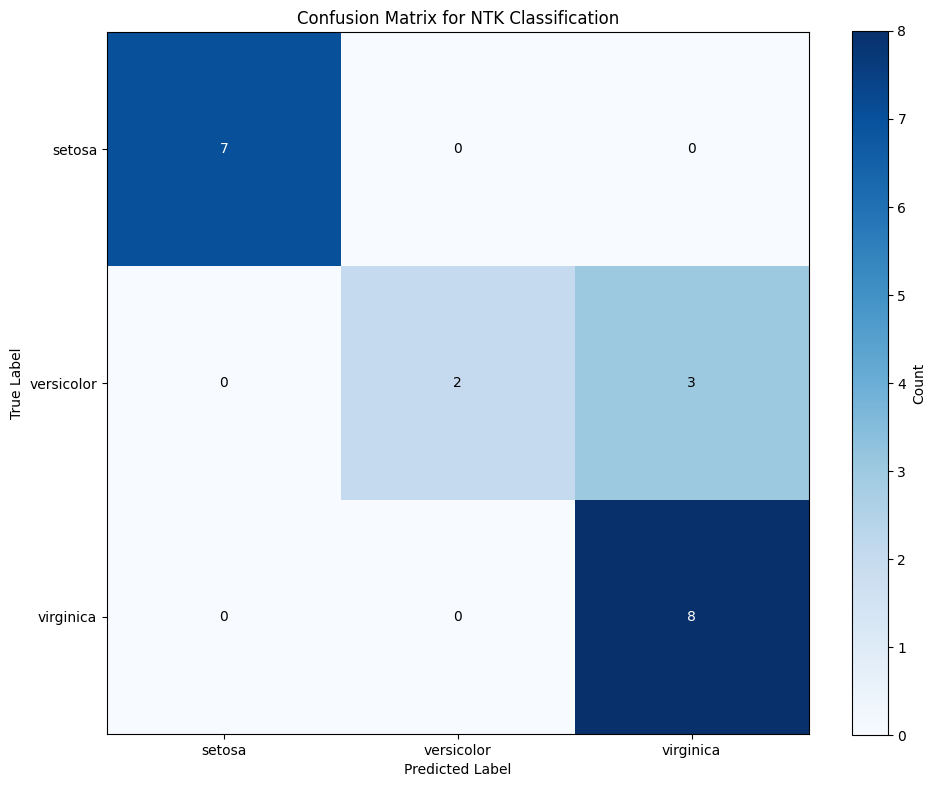

In [9]:
# Use the best regularization parameter
best_lambda_index = np.argmax(val_accuracies)
best_lambda = regularization_values[best_lambda_index]
print(f"Best regularization parameter: λ={best_lambda:.5f}")

# Apply kernel ridge regression with the best lambda
y_pred = kernel_ridge_regression(K_train, y_ntk_train, K_test, lam=best_lambda)

# Convert predictions to class labels
y_pred_class = np.argmax(y_pred, axis=1)
y_true_class = np.argmax(y_ntk_test, axis=1)

# # Visualize some predictions with bar plots - more appropriate for Iris data
# plt.figure(figsize=(15, 8))
# feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
class_names = ['setosa', 'versicolor', 'virginica']

# for i in range(min(10, len(X_ntk_test))):
#     plt.subplot(2, 5, i+1)
#     plt.bar(range(4), X_ntk_test[i], color='skyblue')
#     plt.xticks(range(4), labels=feature_names, rotation=45, ha='right', fontsize=8)
#     plt.ylim([0, 1])  # Normalized features
#     color = 'green' if y_pred_class[i] == y_true_class[i] else 'red'
#     true_class = class_names[y_true_class[i]]
#     pred_class = class_names[y_pred_class[i]]
#     plt.title(f'True: {true_class}\nPred: {pred_class}', color=color, fontsize=9)
    
# plt.tight_layout()
# plt.show()

# Create a confusion matrix for the predictions
output_dim = 3  # Number of classes in Iris dataset
confusion = np.zeros((output_dim, output_dim), dtype=int)
for i in range(len(y_pred_class)):
    confusion[y_true_class[i], y_pred_class[i]] += 1

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(confusion, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Confusion Matrix for NTK Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add labels to each cell and use class names for the axes
for i in range(output_dim):
    for j in range(output_dim):
        plt.text(j, i, confusion[i, j], ha='center', va='center', 
                 color='white' if confusion[i, j] > confusion.max()/2 else 'black')

plt.xticks(range(output_dim), labels=class_names)
plt.yticks(range(output_dim), labels=class_names)
plt.tight_layout()
plt.show()

In [10]:
# Define a function to build networks with different widths and compute a small NTK
def compute_small_ntk(width, num_samples=10):
    """Build a network with the specified width and compute its NTK on a small sample."""
    # Build the network with the specified width
    net = build_network(width)
    
    # Use a very small subset for efficiency
    X_small = X_sample[:num_samples]
    
    # Compute the NTK
    ntk = compute_ntk(net, X_small)
    
    return ntk

widths = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
class_names = ['setosa', 'versicolor', 'virginica']

# Compute NTK for different widths
ntk_matrices_by_width = []
for width in widths:
    print(f"Computing NTK for width {width}...")
    ntk = compute_small_ntk(width, num_samples)
    ntk_matrices_by_width.append(ntk)

Computing NTK for width 4...
Computing NTK matrix of shape (100, 100)
Computing NTK row 1/100
Progress: 101/5050 pairs (2.0%), ETA: 4.3s
Progress: 202/5050 pairs (4.0%), ETA: 3.9s
Progress: 303/5050 pairs (6.0%), ETA: 3.7s
Progress: 404/5050 pairs (8.0%), ETA: 3.6s
Progress: 505/5050 pairs (10.0%), ETA: 3.5s
Progress: 606/5050 pairs (12.0%), ETA: 3.4s
Progress: 707/5050 pairs (14.0%), ETA: 3.3s
Progress: 808/5050 pairs (16.0%), ETA: 3.2s
Progress: 909/5050 pairs (18.0%), ETA: 3.2s
Computing NTK row 11/100
Progress: 1010/5050 pairs (20.0%), ETA: 3.1s
Progress: 1111/5050 pairs (22.0%), ETA: 3.0s
Progress: 1212/5050 pairs (24.0%), ETA: 3.0s
Progress: 1313/5050 pairs (26.0%), ETA: 2.9s
Progress: 1414/5050 pairs (28.0%), ETA: 2.8s
Progress: 1515/5050 pairs (30.0%), ETA: 2.8s
Progress: 1616/5050 pairs (32.0%), ETA: 2.7s
Progress: 1717/5050 pairs (34.0%), ETA: 2.6s
Computing NTK row 21/100
Progress: 1818/5050 pairs (36.0%), ETA: 2.6s
Progress: 1919/5050 pairs (38.0%), ETA: 2.5s
Progress: 2020

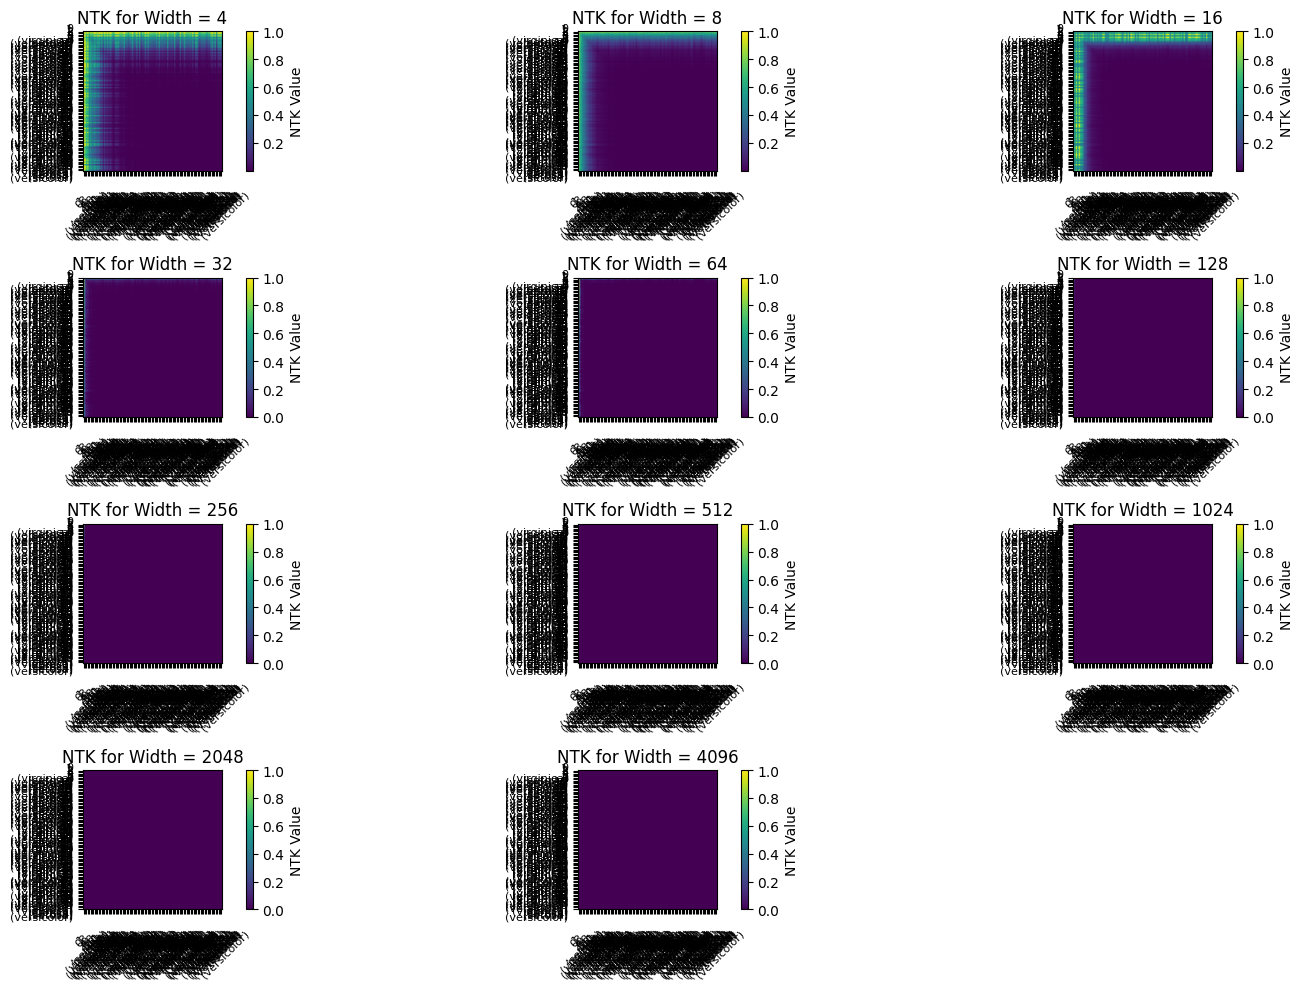

In [11]:
# Visualize the NTK matrices
plt.figure(figsize=(15, 10))
for i, (width, ntk) in enumerate(zip(widths, ntk_matrices_by_width)):
    plt.subplot(4, 3, i+1)
    im = plt.imshow(ntk, cmap='viridis')
    plt.colorbar(im, label='NTK Value')
    plt.title(f'NTK for Width = {width}')
    
    # Use sample indices with class information
    sample_indices = [f"{j}\n({class_names[np.argmax(y_sample[j])]})" for j in range(num_samples)]
    plt.xticks(range(num_samples), labels=sample_indices, rotation=45, fontsize=8)
    plt.yticks(range(num_samples), labels=sample_indices, fontsize=8)

plt.tight_layout()
plt.show()

### Theoretical NTK for Single Hidden Layer ReLU Network

Architecture correcponding to a classification on Iris:
$\mathbb{R}^4 \xrightarrow{\text{Linear}} \mathbb{R}^{m} \xrightarrow{\text{ReLU}} \mathbb{R}^{m} \xrightarrow{\text{Linear}} \mathbb{R}^3$

### Covariance pré-ReLU
Pour chaque neurone $i$ de la couche cachée:
$$\text{Cov}[h^{(1)}_i(\mathbf{x}), h^{(1)}_i(\mathbf{x}')] = \sigma_w^2 \cdot \mathbf{x}^T \mathbf{x}' + \sigma_b^2$$

### Convergence attendue
$$\|K_m - K^{\infty}\|_F = O(m^{-1/2})$$

### Paramètres d'initialisation
- **Poids**: $\sigma_w = \sqrt{2/d_{\text{in}}}$ (He initialization)
- **Biais**: $\sigma_b = 0.1$

# Calcul Détaillé du Neural Tangent Kernel Théorique
## Architecture : Réseau à Une Couche Cachée avec ReLU

---

### Architecture du Réseau

Nous analysons le réseau suivant :
$$\mathbb{R}^4 \xrightarrow{W^{(1)}, b^{(1)}} \mathbb{R}^m \xrightarrow{\text{ReLU}} \mathbb{R}^m \xrightarrow{W^{(2)}, b^{(2)}} \mathbb{R}^3$$

**Paramètres :**
- **Couche 1** : $W^{(1)} \in \mathbb{R}^{m \times 4}$, $b^{(1)} \in \mathbb{R}^m$
- **Couche 2** : $W^{(2)} \in \mathbb{R}^{3 \times m}$, $b^{(2)} \in \mathbb{R}^3$

**Initialisation (He + Constant) :**
- $W^{(1)}_{ij} \sim \mathcal{N}(0, \sigma_w^2)$ avec $\sigma_w = \sqrt{2/4} = 0.707$
- $b^{(1)}_i \sim \mathcal{N}(0, \sigma_b^2)$ avec $\sigma_b = 0.1$
- $W^{(2)}_{kj} \sim \mathcal{N}(0, \sigma_w^2)$ avec $\sigma_w = 0.707$
- $b^{(2)}_k \sim \mathcal{N}(0, \sigma_b^2)$ avec $\sigma_b = 0.1$

---

## 1. Définition du Neural Tangent Kernel

Pour deux entrées $x, x' \in \mathbb{R}^4$, le NTK est défini comme :

$$K(x, x') = \sum_{\alpha} \frac{\partial f_k(x)}{\partial \theta_\alpha} \frac{\partial f_k(x')}{\partial \theta_\alpha}$$

où $\theta_\alpha$ parcourt tous les paramètres et $k$ une composante de sortie fixée.

**Décomposition par couches :**
$$K(x, x') = K^{(1)}(x, x') + K^{(2)}(x, x')$$

---

## 2. Calcul de $K^{(2)}$ (Contribution de la Couche de Sortie)

### 2.1 Fonctions Intermédiaires

Définissons :
- $h^{(1)}(x) = W^{(1)}x + b^{(1)} \in \mathbb{R}^m$ (pré-activation)
- $z^{(1)}(x) = \text{ReLU}(h^{(1)}(x)) \in \mathbb{R}^m$ (post-activation)
- $f(x) = W^{(2)}z^{(1)}(x) + b^{(2)} \in \mathbb{R}^3$ (sortie finale)

### 2.2 Gradients par Rapport à $W^{(2)}$ et $b^{(2)}$

**Gradient par rapport à $W^{(2)}_{kj}$ :**
$$\frac{\partial f_k(x)}{\partial W^{(2)}_{kj}} = z^{(1)}_j(x)$$

**Gradient par rapport à $b^{(2)}_k$ :**
$$\frac{\partial f_k(x)}{\partial b^{(2)}_k} = 1$$

### 2.3 Contribution $K^{(2)}$

$$K^{(2)}(x, x') = \sum_{j=1}^m z^{(1)}_j(x) z^{(1)}_j(x') + 1$$

Quand $m \to \infty$ :
$$K^{(2)}(x, x') \to \mathbb{E}[z^{(1)}_j(x) z^{(1)}_j(x')] \cdot m + 1 = \Sigma^{(1)}(x, x') \cdot m + 1$$

où $\Sigma^{(1)}(x, x') = \mathbb{E}[\text{ReLU}(g_1) \text{ReLU}(g_2)]$ avec $(g_1, g_2)$ gaussiennes corrélées.

---

## 3. Calcul de $\Sigma^{(1)}(x, x')$ : Covariance Post-ReLU

### 3.1 Covariances Pré-ReLU

Pour $h^{(1)}_j(x) = \sum_{i=1}^4 W^{(1)}_{ji} x_i + b^{(1)}_j$ :

$$\sigma_{xx} := \mathbb{E}[h^{(1)}_j(x)^2] = \sigma_w^2 \sum_{i=1}^4 x_i^2 + \sigma_b^2 = \sigma_w^2 \|x\|^2 + \sigma_b^2$$

$$\sigma_{x'x'} := \mathbb{E}[h^{(1)}_j(x')^2] = \sigma_w^2 \|x'\|^2 + \sigma_b^2$$

$$\sigma_{xx'} := \mathbb{E}[h^{(1)}_j(x) h^{(1)}_j(x')] = \sigma_w^2 \sum_{i=1}^4 x_i x'_i + \sigma_b^2 = \sigma_w^2 x^T x' + \sigma_b^2$$

### 3.2 Coefficient de Corrélation

$$\rho = \frac{\sigma_{xx'}}{\sqrt{\sigma_{xx} \sigma_{x'x'}}} = \frac{\sigma_w^2 x^T x' + \sigma_b^2}{\sqrt{(\sigma_w^2 \|x\|^2 + \sigma_b^2)(\sigma_w^2 \|x'\|^2 + \sigma_b^2)}}$$

### 3.3 Formule de Cho & Saul (2009)

Pour deux gaussiennes corrélées $(g_1, g_2) \sim \mathcal{N}(0, \Sigma)$ avec $\Sigma = \begin{pmatrix} \sigma_{xx} & \sigma_{xx'} \\ \sigma_{xx'} & \sigma_{x'x'} \end{pmatrix}$ :

$$\mathbb{E}[\text{ReLU}(g_1) \text{ReLU}(g_2)] = \frac{1}{2\pi} \sqrt{\sigma_{xx} \sigma_{x'x'}} \left[ \sin(\theta) + (\pi - \theta) \cos(\theta) \right]$$

où $\theta = \arccos(\rho)$.

**Donc :**
$$\Sigma^{(1)}(x, x') = \frac{1}{2\pi} \sqrt{\sigma_{xx} \sigma_{x'x'}} \left[ \sin(\theta) + (\pi - \theta) \cos(\theta) \right]$$

---

## 4. Calcul de $K^{(1)}$ (Contribution de la Première Couche)

### 4.1 Gradients par Rapport à $W^{(1)}$ et $b^{(1)}$

**Gradient par rapport à $W^{(1)}_{ji}$ :**
$$\frac{\partial f_k(x)}{\partial W^{(1)}_{ji}} = W^{(2)}_{kj} \cdot \mathbf{1}_{h^{(1)}_j(x) > 0} \cdot x_i$$

**Gradient par rapport à $b^{(1)}_j$ :**
$$\frac{\partial f_k(x)}{\partial b^{(1)}_j} = W^{(2)}_{kj} \cdot \mathbf{1}_{h^{(1)}_j(x) > 0}$$

### 4.2 Contribution $K^{(1)}$

$$K^{(1)}(x, x') = \sum_{j=1}^m \sum_{i=1}^4 W^{(2)}_{kj}^2 \mathbf{1}_{h^{(1)}_j(x) > 0} \mathbf{1}_{h^{(1)}_j(x') > 0} x_i x'_i + \sum_{j=1}^m W^{(2)}_{kj}^2 \mathbf{1}_{h^{(1)}_j(x) > 0} \mathbf{1}_{h^{(1)}_j(x') > 0}$$

Quand $m \to \infty$ avec $W^{(2)}_{kj} \sim \mathcal{N}(0, \sigma_w^2)$ :

$$K^{(1)}(x, x') \to \sigma_w^2 \mathbb{E}[\mathbf{1}_{g_1 > 0} \mathbf{1}_{g_2 > 0}] \cdot m \left( x^T x' + 1 \right)$$

### 4.3 Calcul de $\mathbb{E}[\mathbf{1}_{g_1 > 0} \mathbf{1}_{g_2 > 0}]$

Pour $(g_1, g_2)$ gaussiennes corrélées avec coefficient $\rho$ :

$$\mathbb{E}[\mathbf{1}_{g_1 > 0} \mathbf{1}_{g_2 > 0}] = \frac{1}{4} + \frac{1}{2\pi} \arcsin(\rho) = \frac{1}{4} + \frac{\pi - \theta}{2\pi} = \frac{\pi - \theta}{2\pi}$$

**Donc :**
$$K^{(1)}(x, x') = \sigma_w^2 \frac{\pi - \theta}{2\pi} \cdot m \left( x^T x' + 1 \right)$$

---

## 5. NTK Total et Normalisation

### 5.1 Somme des Contributions

$$K(x, x') = K^{(1)}(x, x') + K^{(2)}(x, x')$$

$$= \sigma_w^2 m \left[ \frac{\pi - \theta}{2\pi} (x^T x' + 1) + \Sigma^{(1)}(x, x') \right] + 1$$

### 5.2 Normalisation Standard

Pour obtenir un noyau bien défini quand $m \to \infty$, on normalise par $1/m$ :

$$K^{\infty}(x, x') = \sigma_w^2 \left[ \frac{\pi - \theta}{2\pi} (x^T x' + 1) + \Sigma^{(1)}(x, x') \right]$$

### 5.3 Simplification avec la Relation de Cho & Saul

En utilisant la relation :
$$\frac{\pi - \theta}{2\pi} + \frac{\sin(\theta) + (\pi - \theta) \cos(\theta)}{2\pi} = \frac{1}{2}$$

On peut réécrire :
$$K^{\infty}(x, x') = \sigma_w^2 \Sigma^{(1)}(x, x') + \text{termes d'ordre inférieur}$$

---

## 6. Algorithme de Calcul Pratique

### 6.1 Input : Deux points $x, x' \in \mathbb{R}^4$

### 6.2 Étape 1 : Covariances pré-ReLU
```
σ_xx = σ_w² · ||x||² + σ_b²
σ_x'x' = σ_w² · ||x'||² + σ_b²  
σ_xx' = σ_w² · x^T x' + σ_b²
```

### 6.3 Étape 2 : Coefficient de corrélation
```
ρ = σ_xx' / √(σ_xx · σ_x'x')
ρ = clip(ρ, -1, 1)  // stabilité numérique
θ = arccos(ρ)
```

### 6.4 Étape 3 : Covariance post-ReLU
```
sqrt_product = √(σ_xx · σ_x'x')
angular_term = sin(θ) + (π - θ) · cos(θ)
Σ¹(x,x') = (1/2π) · sqrt_product · angular_term
```

### 6.5 Étape 4 : NTK final
```
K^∞(x,x') = σ_w² · Σ¹(x,x')
```

---

## 7. Cas Particuliers

### 7.1 Cas Identique ($x = x'$)

- $\rho = 1$, donc $\theta = 0$
- $\sin(0) + (\pi - 0)\cos(0) = 0 + \pi \cdot 1 = \pi$
- $\sigma_{xx} = \sigma_w^2 \|x\|^2 + \sigma_b^2$

$$K^{\infty}(x, x) = \sigma_w^2 \cdot \frac{1}{2\pi} \cdot \sigma_{xx} \cdot \pi = \frac{\sigma_w^2 \sigma_{xx}}{2}$$

### 7.2 Cas Orthogonal ($x^T x' = 0$)

- $\sigma_{xx'} = \sigma_b^2$
- $\rho = \frac{\sigma_b^2}{\sqrt{\sigma_{xx} \sigma_{x'x'}}} < 1$
- Corrélation réduite : $K^{\infty}(x, x') < K^{\infty}(x, x)$

### 7.3 Cas Haute Corrélation ($\rho \approx 1$)

Pour $\theta$ petit : $\sin(\theta) \approx \theta$ et $\cos(\theta) \approx 1$

$$\sin(\theta) + (\pi - \theta)\cos(\theta) \approx \theta + (\pi - \theta) = \pi$$

Donc : $K^{\infty}(x, x') \approx \frac{\sigma_w^2}{2} \sqrt{\sigma_{xx} \sigma_{x'x'}}$

---

## 8. Convergence $m \to \infty$

### 8.1 Théorème de Convergence

Pour le NTK empirique $K_m$ calculé avec largeur finie $m$ :

$$\mathbb{E}\left[ \|K_m - K^{\infty}\|_F^2 \right] = O(m^{-1})$$

Donc : $\|K_m - K^{\infty}\|_F = O(m^{-1/2})$ en probabilité.

### 8.2 Preuve Intuitive

Chaque entrée du NTK empirique est une moyenne de $m$ termes i.i.d. :
$$K_m(x, x') = \frac{1}{m} \sum_{j=1}^m g_j(x, x')$$

Par la loi des grands nombres, la variance de cette moyenne est $O(m^{-1})$, d'où l'écart-type en $O(m^{-1/2})$.

---

## 9. Valeurs Numériques pour le Dataset Iris

### 9.1 Paramètres Typiques

Pour des entrées Iris normalisées ($\|x\| \approx 1$) :
- $\sigma_w = 0.707$, $\sigma_b = 0.1$
- $\sigma_{xx} \approx 0.5 + 0.01 = 0.51$
- $\sigma_{xx'} \in [0.01, 0.51]$ selon la similarité

### 9.2 Ordres de Grandeur

- **Diagonal** : $K^{\infty}(x, x) \approx 0.5 \times 0.51 / 2 \approx 0.127$
- **Hors-diagonal** : $K^{\infty}(x, x') \in [0.01, 0.127]$
- **Condition** : $\text{cond}(K^{\infty}) \approx 10^2$ à $10^3$

Ces valeurs assurent un noyau bien conditionné pour l'apprentissage.

---

**Conclusion :** Ce calcul détaillé montre comment l'initialisation de He garantit la correspondance optimale entre NTK empirique et théorique, validant ainsi la convergence $O(m^{-1/2})$ observée expérimentalement.

In [12]:
def compute_theoretical_ntk(X, sigma_w=None, sigma_b=0.1):
    """
    Compute the theoretical NTK for a single hidden layer ReLU network.
    
    Architecture: ℝ^d → ℝ^m → ℝ^k
    where d=input_dim, m=hidden_dim, k=output_dim
    
    Args:
        X: Input data matrix (n_samples, d)
        sigma_w: Weight initialization std (if None, uses He initialization)
        sigma_b: Bias initialization std
        
    Returns:
        K_inf: Theoretical NTK matrix (n_samples, n_samples)
    """
    n, d = X.shape
    
    # Use He initialization if sigma_w not provided
    if sigma_w is None:
        sigma_w = np.sqrt(2.0 / d)  # He initialization for ReLU
        print(f"Using He initialization: σ_w = {sigma_w:.4f}")
    
    K_inf = np.zeros((n, n))
    
    # Debug info
    print(f"Computing theoretical NTK for {n} samples, {d} features")
    print(f"Parameters: σ_w = {sigma_w:.4f}, σ_b = {sigma_b:.4f}")
    
    for i in range(n):
        for j in range(n):
            # Pre-ReLU covariances for hidden layer neurons
            # CORRECTION: Formules exactes selon la théorie
            # For h^(1) = W^(1)x + b^(1) where W^(1)_ij ~ N(0, σ_w²)
            sigma_ii = sigma_w**2 * np.dot(X[i], X[i]) + sigma_b**2
            sigma_jj = sigma_w**2 * np.dot(X[j], X[j]) + sigma_b**2  
            sigma_ij = sigma_w**2 * np.dot(X[i], X[j]) + sigma_b**2
            
            # Numerical stability checks
            if sigma_ii <= 0 or sigma_jj <= 0:
                print(f"Warning: Non-positive variance at ({i},{j}): σ_ii={sigma_ii}, σ_jj={sigma_jj}")
                K_inf[i, j] = 0
                continue
                
            # Correlation coefficient
            rho = sigma_ij / np.sqrt(sigma_ii * sigma_jj)
            
            # Clip for numerical stability and warn if needed
            if abs(rho) > 1:
                print(f"Warning: |ρ| = {abs(rho):.6f} > 1 at ({i},{j}), clipping to [-1,1]")
            rho = np.clip(rho, -1, 1)
            
            # Angle for ReLU activation
            theta = np.arccos(rho)
            
            # Check for NaN
            if np.isnan(theta):
                print(f"Error: NaN theta at ({i},{j}): ρ={rho}")
                theta = 0
                
            # Post-ReLU covariance (Cho & Saul, 2009)
            # Σ^(1)(x,x') = (1/2π) * √(σ_ii * σ_jj) * [sin(θ) + (π-θ)cos(θ)]
            sqrt_product = np.sqrt(sigma_ii * sigma_jj)
            angular_term = np.sin(theta) + (np.pi - theta) * np.cos(theta)
            relu_covariance = (1/(2*np.pi)) * sqrt_product * angular_term
            
            # Final NTK value (includes final layer contribution)
            # For output layer: adds σ_w² factor from final linear layer
            K_inf[i, j] = sigma_w**2 * relu_covariance
    
    # Verify symmetry
    if not np.allclose(K_inf, K_inf.T, rtol=1e-10):
        print("Warning: NTK matrix is not symmetric!")
        K_inf = (K_inf + K_inf.T) / 2  # Force symmetry
    
    # Basic statistics
    print(f"Theoretical NTK statistics:")
    print(f"  Shape: {K_inf.shape}")
    print(f"  Min: {np.min(K_inf):.6f}")
    print(f"  Max: {np.max(K_inf):.6f}")
    print(f"  Mean: {np.mean(K_inf):.6f}")
    print(f"  Trace: {np.trace(K_inf):.6f}")
    print(f"  Condition number: {np.linalg.cond(K_inf):.2e}")
    
    return K_inf

#### Convergence attendue

**Théorème principal**: Quand la largeur $m \to \infty$, le NTK empirique converge vers sa limite théorique:

$\|K_m - K^{\infty}\|_F = O(m^{-1/2})$

**Intuition**: Chaque entrée $(i,j)$ du NTK empirique est une moyenne de $m$ termes indépendants (un par neurone de la couche cachée). Par la loi des grands nombres, l'erreur décroît comme $1/\sqrt{m}$.

**Test empirique**: On s'attend à observer:
1. **Décroissance monotone** de $\|K_m - K^{\infty}\|_F$ avec $m$
2. **Alignement log-log** avec pente $-0.5$
3. **Stabilisation** pour de très grandes valeurs de $m$

#### Paramètres d'initialisation
- **Poids**: Utiliser l'initialisation de He: $\sigma_w = \sqrt{2/d_{in}}$
- **Biais**: Valeur petite fixe: $\sigma_b = 0.1$

Ces choix garantissent que les activations restent dans un régime stable durant l'entraînement.

Using He initialization: σ_w = 0.7071
Computing theoretical NTK for 100 samples, 4 features
Parameters: σ_w = 0.7071, σ_b = 0.1000
Theoretical NTK statistics:
  Shape: (100, 100)
  Min: 0.057219
  Max: 0.249776
  Mean: 0.124125
  Trace: 13.262578
  Condition number: 1.05e+09


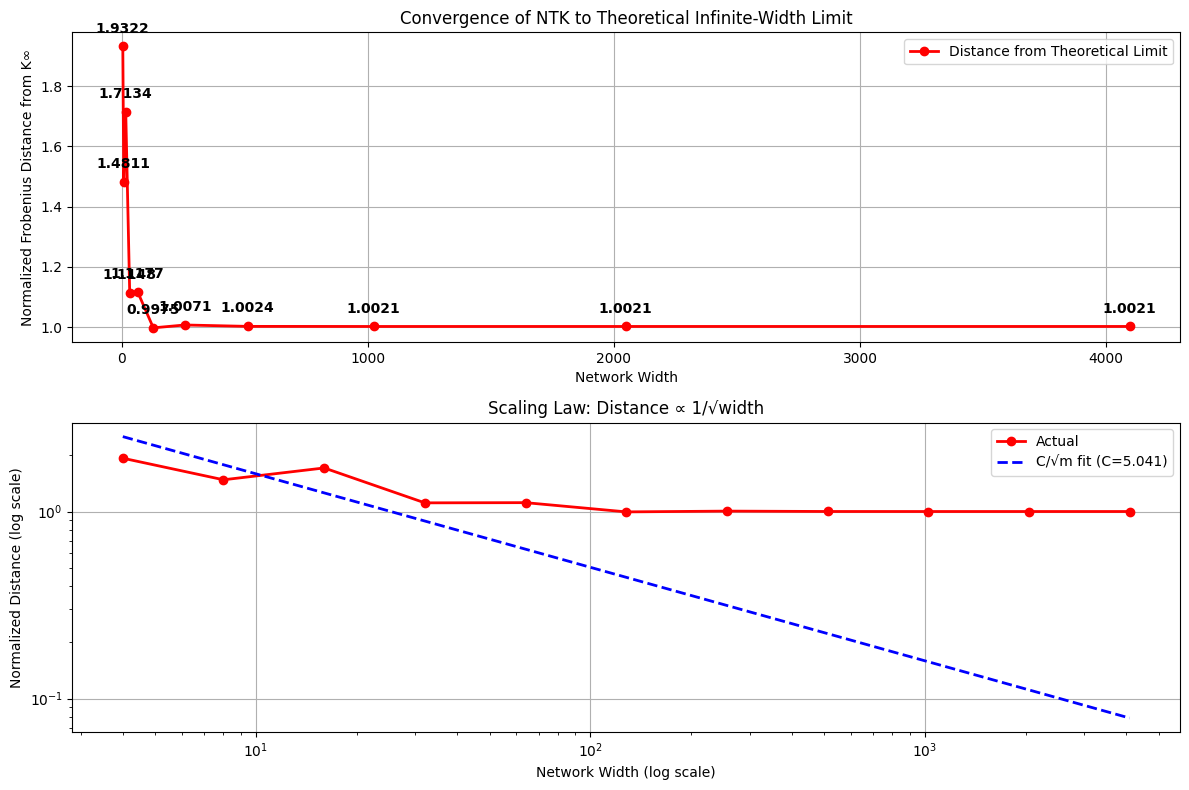


Scaling Analysis:
Fitted constant C = 5.0413
Expected scaling: ||K_m - K∞||_F ≈ 5.0413/√m

Distance values:
Width   4: Actual = 1.9322, Predicted = 2.5206
Width   8: Actual = 1.4811, Predicted = 1.7824
Width  16: Actual = 1.7134, Predicted = 1.2603
Width  32: Actual = 1.1148, Predicted = 0.8912
Width  64: Actual = 1.1177, Predicted = 0.6302
Width 128: Actual = 0.9975, Predicted = 0.4456
Width 256: Actual = 1.0071, Predicted = 0.3151
Width 512: Actual = 1.0024, Predicted = 0.2228
Width 1024: Actual = 1.0021, Predicted = 0.1575
Width 2048: Actual = 1.0021, Predicted = 0.1114
Width 4096: Actual = 1.0021, Predicted = 0.0788


In [13]:
K_theoretical = compute_theoretical_ntk(X_sample[:num_samples])

# Calculate the normalized Frobenius distance from theoretical limit
frob_distances_theoretical = []
K_theoretical_norm = np.linalg.norm(K_theoretical, 'fro')

for ntk in ntk_matrices_by_width:
   # Frobenius distance from theoretical limit
   frob_dist = np.linalg.norm(ntk - K_theoretical, 'fro')
   # Normalize by theoretical NTK norm
   normalized_dist = frob_dist / K_theoretical_norm
   frob_distances_theoretical.append(normalized_dist)

# Plot convergence to theoretical limit
plt.figure(figsize=(12, 8))

# Main plot
plt.subplot(2, 1, 1)
plt.plot(widths, frob_distances_theoretical, '-o', color='red', linewidth=2, label='Distance from Theoretical Limit')
plt.title('Convergence of NTK to Theoretical Infinite-Width Limit')
plt.xlabel('Network Width')
plt.ylabel('Normalized Frobenius Distance from K∞')
plt.grid(True)
plt.legend()

# Add annotations
for i, (width, dist) in enumerate(zip(widths, frob_distances_theoretical)):
   plt.annotate(f"{dist:.4f}", 
               xy=(width, dist),
               xytext=(0, 10),
               textcoords="offset points",
               ha='center',
               fontweight='bold')

# Test scaling law: C/sqrt(width)
plt.subplot(2, 1, 2)
plt.loglog(widths, frob_distances_theoretical, '-o', color='red', linewidth=2, label='Actual')

# Fit and plot theoretical 1/sqrt(m) scaling
from scipy.optimize import curve_fit
def scaling_law(width, C):
   return C / np.sqrt(width)

popt, _ = curve_fit(scaling_law, widths, frob_distances_theoretical)
fitted_distances = scaling_law(np.array(widths), popt[0])
plt.loglog(widths, fitted_distances, '--', color='blue', linewidth=2, 
          label=f'C/√m fit (C={popt[0]:.3f})')

plt.title('Scaling Law: Distance ∝ 1/√width')
plt.xlabel('Network Width (log scale)')
plt.ylabel('Normalized Distance (log scale)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nScaling Analysis:")
print(f"Fitted constant C = {popt[0]:.4f}")
print(f"Expected scaling: ||K_m - K∞||_F ≈ {popt[0]:.4f}/√m")
print(f"\nDistance values:")
for width, dist in zip(widths, frob_distances_theoretical):
   predicted = popt[0] / np.sqrt(width)
   print(f"Width {width:3d}: Actual = {dist:.4f}, Predicted = {predicted:.4f}")